# import libraries and model using api

In [2]:
import gensim
from gensim.models import Word2Vec,KeyedVectors
import gensim.downloader as api

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer

In [40]:
from tqdm import tqdm

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
w2v=api.load('word2vec-google-news-300')

# Load data

In [16]:
messages=pd.read_csv('sms collection.csv',sep='\t',names=['label','message'])

# Preprocessing and cleaning

In [19]:
lemmatizer=WordNetLemmatizer()

In [21]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review]
    review=' '.join(review)
    corpus.append(review)

In [22]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [24]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

# Train model from scratch

In [26]:
model=Word2Vec(words,vector_size=100)

In [27]:
model.wv.index_to_key

['to',
 'you',
 'the',
 'it',
 'and',
 'in',
 'is',
 'me',
 'my',
 'for',
 'your',
 'call',
 'of',
 'that',
 'have',
 'on',
 'now',
 'are',
 'can',
 'so',
 'but',
 'not',
 'or',
 'we',
 'do',
 'get',
 'at',
 'ur',
 'will',
 'if',
 'be',
 'with',
 'no',
 'just',
 'this',
 'gt',
 'lt',
 'go',
 'how',
 'up',
 'when',
 'ok',
 'day',
 'what',
 'free',
 'from',
 'all',
 'out',
 'know',
 'll',
 'come',
 'like',
 'good',
 'time',
 'am',
 'then',
 'got',
 'wa',
 'there',
 'he',
 'love',
 'text',
 'only',
 'want',
 'send',
 'one',
 'need',
 'txt',
 'today',
 'by',
 'going',
 'don',
 'stop',
 'home',
 'she',
 'about',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'dont',
 'our',
 'think',
 'tell',
 'week',
 'hi',
 'phone',
 'they',
 'new',
 'please',
 'later',
 'pls',
 'any',
 'her',
 'ha',
 'co',
 'did',
 'been',
 'msg',
 'min',
 'some',
 'an',
 'night',
 'make',
 'dear',
 'who',
 'here',
 'message',
 'say',
 'well',
 'where',
 're',
 'thing',
 'much',
 'oh',

In [28]:
model.corpus_count

5569

In [29]:
model.epochs

5

In [36]:
model.wv.similar_by_word('king')

[('cant', 0.9960101246833801),
 ('done', 0.9959331154823303),
 ('life', 0.9959076642990112),
 ('hello', 0.9958781003952026),
 ('lot', 0.995861828327179),
 ('her', 0.9958426356315613),
 ('anything', 0.9958180785179138),
 ('ah', 0.9957959055900574),
 ('yo', 0.995782732963562),
 ('which', 0.9957757592201233)]

In [37]:
model.wv['good']

array([-0.24897027,  0.33084577,  0.16346368,  0.15568075,  0.11149477,
       -0.6984524 ,  0.25727558,  0.6918162 , -0.4114534 , -0.18366343,
       -0.20221809, -0.54856294,  0.00362773,  0.14257124,  0.31352532,
       -0.2275869 ,  0.17472681, -0.42739224, -0.01632153, -0.7801633 ,
        0.3439839 ,  0.1590564 ,  0.1754821 , -0.30931592, -0.0404839 ,
        0.00127566, -0.29998505, -0.2926492 , -0.35360578,  0.06946367,
        0.48349786,  0.01494156,  0.18162581, -0.2666099 , -0.13779822,
        0.6313112 ,  0.07535893, -0.18490146, -0.15952127, -0.6619338 ,
        0.16841611, -0.40251285, -0.2298121 ,  0.00436397,  0.22129849,
       -0.00144091, -0.22919956, -0.06622165,  0.27454028,  0.18584327,
        0.30338722, -0.27363566, -0.08408396,  0.05524021, -0.09475663,
        0.11971994,  0.25133672,  0.04784576, -0.61378795,  0.21702549,
       -0.00208689,  0.22575013, -0.02551347, -0.10460481, -0.4426988 ,
        0.41770822,  0.12636772,  0.3702957 , -0.46015367,  0.59

In [63]:
def avg_w2v(doc):
    vectors = [model.wv[word] for word in doc if word in model.wv.index_to_key]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

In [64]:
x=[]
for i in tqdm(range(len(words))):
    x.append(avg_w2v(words[i]))

100%|████████████████████████████████████████████████████████████████████████████| 5569/5569 [00:03<00:00, 1488.62it/s]


In [65]:
len(x)

5569

In [82]:
x=np.array(x)

In [84]:
x[0]

array([-0.16354959,  0.2240843 ,  0.12566324,  0.09775086,  0.08606908,
       -0.5000475 ,  0.17197283,  0.4608044 , -0.27795309, -0.14111659,
       -0.14016311, -0.37504977, -0.03358563,  0.09893017,  0.21677312,
       -0.14481081,  0.10223546, -0.29655668, -0.01824164, -0.52020252,
        0.20135616,  0.10693289,  0.10200179, -0.21556257, -0.02624409,
        0.00730396, -0.21697623, -0.18690611, -0.2522476 ,  0.05135443,
        0.31217605,  0.02139938,  0.10600869, -0.18542236, -0.1011624 ,
        0.43333754,  0.06965733, -0.13475475, -0.14786428, -0.45578757,
        0.10779783, -0.26659548, -0.1710377 , -0.00744544,  0.14979528,
       -0.01733653, -0.1389937 , -0.03812264,  0.21838628,  0.13089229,
        0.1913479 , -0.19815291, -0.05363989,  0.05886443, -0.10542171,
        0.07286154,  0.16107492,  0.01520579, -0.42244312,  0.14829877,
        0.00862995,  0.15447928, -0.01299991, -0.07622037, -0.30808628,
        0.28843975,  0.0692325 ,  0.2357675 , -0.33734238,  0.39

In [69]:
x[0].shape

(100,)

# process Data

In [76]:
labels=messages[list(map(lambda x:len(x)>0,corpus))]

In [79]:
le=LabelEncoder()

In [80]:
y=le.fit_transform(labels['label'])

In [81]:
y.shape

(5569,)

# creating data frame

In [87]:
df=pd.DataFrame(np.vstack(x))

In [88]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.163550,0.224084,0.125663,0.097751,0.086069,-0.500048,0.171973,0.460804,-0.277953,-0.141117,...,0.353229,0.175455,0.002474,0.040779,0.421950,0.185736,0.154261,-0.195392,0.154619,0.002987
1,-0.154149,0.201199,0.109992,0.089198,0.081956,-0.446885,0.141386,0.413754,-0.249266,-0.118475,...,0.318082,0.150810,-0.002606,0.028343,0.362715,0.157930,0.135636,-0.180696,0.143015,-0.005194
2,-0.168549,0.237810,0.135944,0.107734,0.078195,-0.541265,0.170343,0.440060,-0.295144,-0.162273,...,0.347700,0.185990,-0.003945,0.013725,0.419513,0.172370,0.110416,-0.219457,0.176768,0.025263
3,-0.222217,0.299175,0.161466,0.136541,0.113852,-0.664916,0.222160,0.621136,-0.374359,-0.180360,...,0.472103,0.229734,-0.000947,0.061610,0.550263,0.249327,0.220071,-0.262123,0.204990,-0.007136
4,-0.198285,0.248786,0.143675,0.113523,0.106191,-0.569207,0.189399,0.535513,-0.323826,-0.162489,...,0.410034,0.191118,0.002096,0.055581,0.473811,0.217284,0.182570,-0.238600,0.171323,-0.003794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,-0.187983,0.276585,0.170243,0.125575,0.098618,-0.611247,0.210152,0.523149,-0.338377,-0.184837,...,0.410896,0.214238,0.004103,0.023697,0.501710,0.203731,0.140928,-0.244470,0.197440,0.026572
5565,-0.200016,0.261761,0.146416,0.126035,0.100891,-0.605981,0.202439,0.551120,-0.344253,-0.163314,...,0.424240,0.212252,-0.007812,0.044826,0.499168,0.218173,0.172299,-0.248395,0.189390,0.004264
5566,-0.226716,0.308500,0.167590,0.126108,0.108761,-0.670098,0.233294,0.627873,-0.375613,-0.195609,...,0.483033,0.242295,0.008291,0.069104,0.569652,0.257757,0.225102,-0.255101,0.201907,-0.001483
5567,-0.203457,0.273329,0.151899,0.121462,0.102934,-0.612059,0.203856,0.556416,-0.340078,-0.179261,...,0.425560,0.213277,0.007270,0.051169,0.509508,0.226926,0.181287,-0.239991,0.183096,-0.000495


In [90]:
x=df

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [93]:
models={'XGBclassifier':XGBClassifier(),'adb':AdaBoostClassifier(),'GB':GradientBoostingClassifier(),"Logistic_regression":LogisticRegression(),"KNN":KNeighborsClassifier(),"Random_forest":RandomForestClassifier()}

In [94]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluate given dictionary of models
    x,_train "training data
    x_test testing data
    y_train training labels
    y_test testing labels
    """
    np.random.seed(42)
    model_scores={}
    for name , model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores    

In [95]:
scores=fit_and_score(models,x_train,x_test,y_train,y_test)

In [97]:
scores

{'XGBclassifier': 0.9874326750448833,
 'adb': 0.9596050269299821,
 'GB': 0.9730700179533214,
 'Logistic_regression': 0.9317773788150808,
 'KNN': 0.9596050269299821,
 'Random_forest': 0.9730700179533214}

<Axes: >

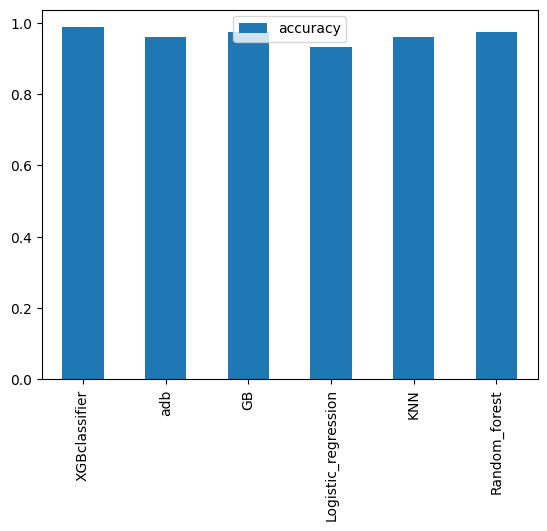

In [96]:
pd.DataFrame(scores,index=['accuracy']).T.plot.bar()